# Feature Scaling

In simple words, once we are done with all the other steps of feature engineering, like ecoding variables, handling missing values etc, then we scale all the variable to a very small range of say -1 to +1. So all the data gets squeezed to decimal points between -1 and +1. What it does is keep the distribution of the data, the correlation and covariance absolutely the same however scales every independent or the feature matrix columns to a smaller scale.

Why needed?

    The main purpose of scaling is to avoid the effects of greater numeric ranges.
    
    Gradient Descent performs better with scaling else it takes long/elongated route of cost function to reach minima.
    
    to restate each variable on a standardized scale and to avoid numerical instabilities potentially caused by too large numbers, to speed up optimization algorithms. 
    
    be sure that apply scaling both of training and test data. We want to scale all data to the same scale.

Where needed?
Especially it is so important to machine learning **algorithms in which the distance is important**, such as:

    Linear regression
    Logistic regression
    KNN (k Nearest Neighbor), 
    K-Means Clustering, 
    SVM (Support Vector Machine), 
    PCA (Principal Component Analysis) algorithms.
    
    Not needed in :- Tree based algorithms, Probabilistic models like NaiveBayes'

Types of feature scaling:

    STANDARDIZATION:
        STANDARD SCALER
    NORMALIZATION:
        MIN MAX SCALER
        MEAN NORMALIZATION
        MAX ABSOLUTE SCALING
        ROBUST SCALING

# Standard scaler:

    mean-based scaling method
    vulnerable to outliers because outliers affect the mean.
    moves your data closer to the standard normal distribution
    values get centered around the mean with a unit standard deviation. 
    This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
    better to remove outliers firstly
    If the data is too much right or left skewed, first apply log transform to bring data close to normal distribution and then standard scaling
    
    z = (x - μ) / σ
    
    Scatterplot : The scale changed and the distribution came to the centre or 0.
    
    PDF or KDE : In the probability density function, the kde plot is exactly the same, so this shows how the distribution is not effected by standardization.

    It is not suitable for data that have outliers.

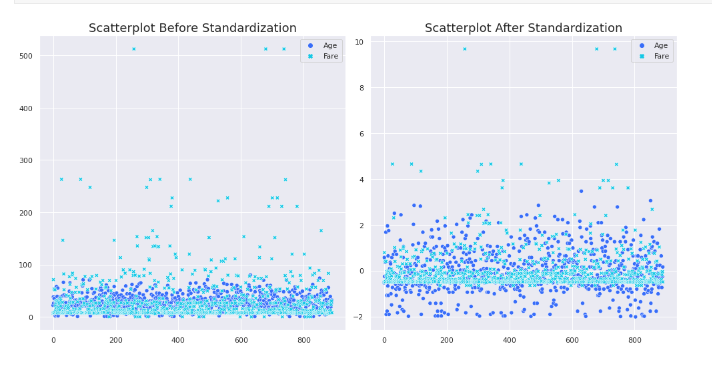

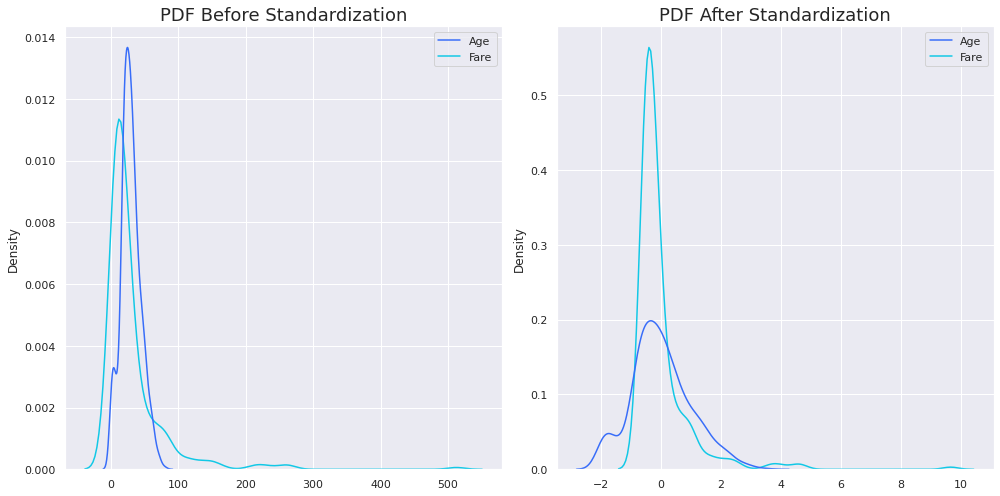

# Normalization 

is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

    MinMax scaler
    Mean normalization
    Max absolute scaling
    Robust scaling

### MIN MAX

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

    X' = (X−Xmin) / (Xmax−Xmin)

Min Max Normalization will perform best when the maximum and minimum value is very distinct and known.

Min Max Normalization will perform best when the maximum and minimum value is very distinct and known.

It is not suitable for data that have outliers.

It adjusts the data between 0 and 1.

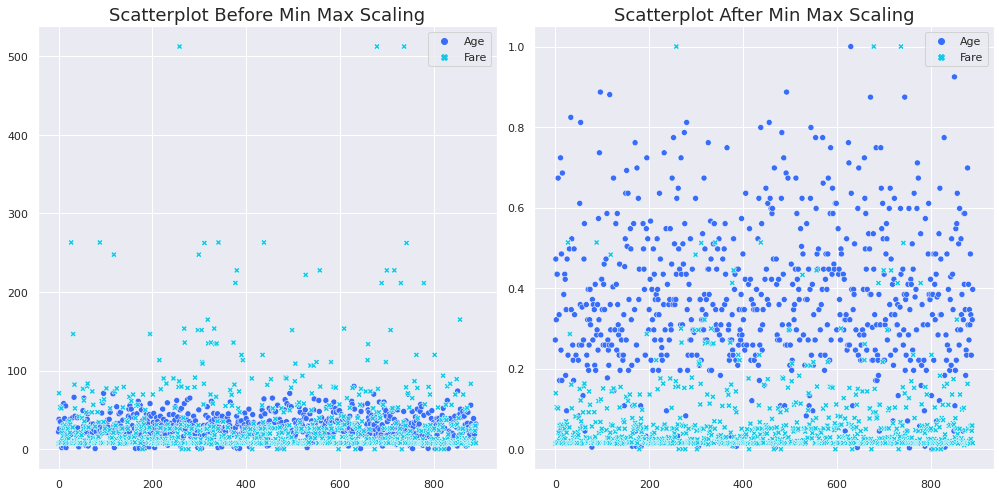

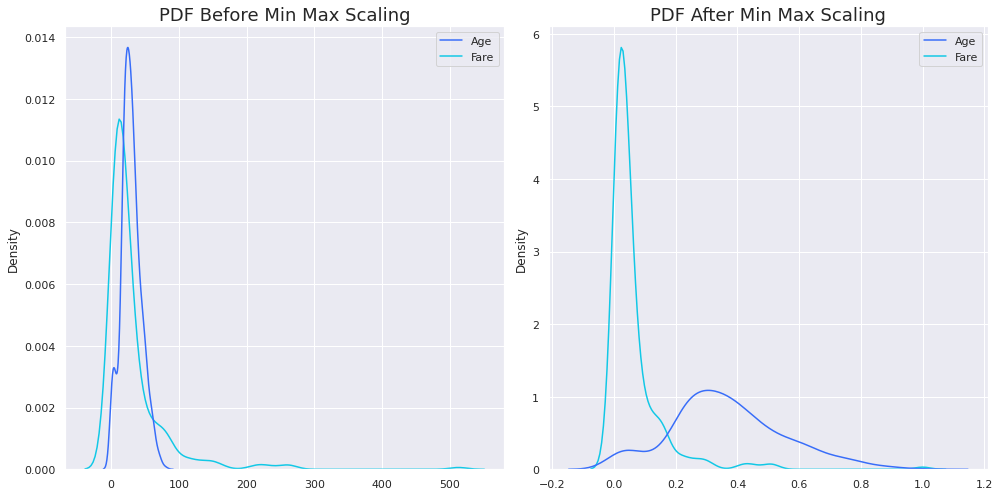

### MAX ABSOLUTE SCALING

Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. 

It does not shift/center the data, and thus does not destroy any sparsity. This scaler can also be applied to sparse CSR or CSC matrices.

Max Absolute scaling will perform a lot better in sparse data or when most of the values are 0.

It is not suitable for data that have outliers.

If the data has negative values, MaxAbsScaler sets the data between -1 and 1. It adjusts the data between -1 and 1.

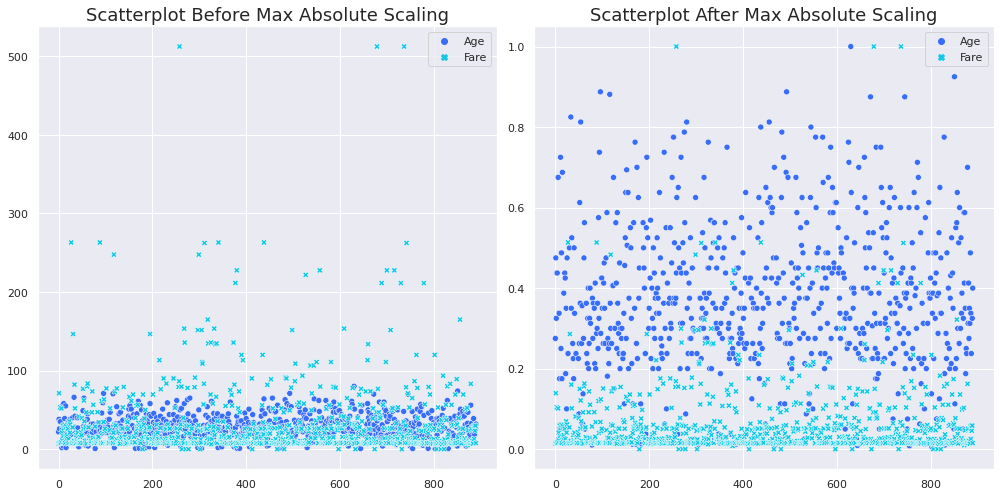

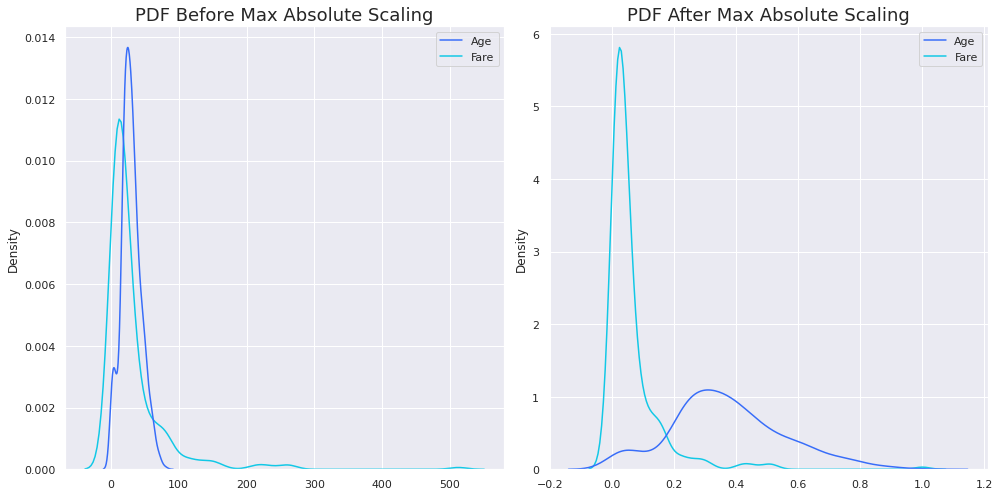

### ROBUST SCALING

median-based scaling method, not affected by outlier

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

    X' = [X - median(X)] / (Q3 - Q1)
    
It is more suitable for data that have outliers, if you dont want to remove outliers.

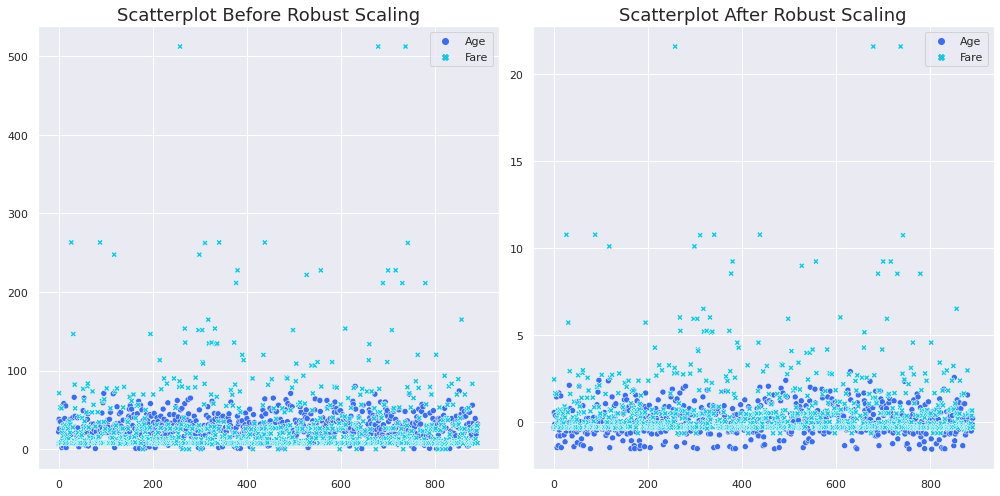

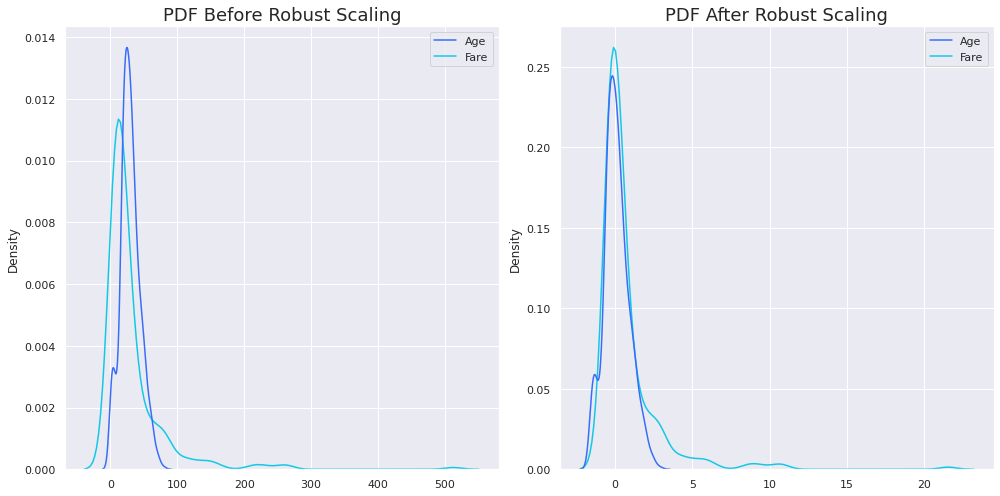

Below, the original data (without scale) have outliers at points 250000 and 200000, after RobustScaler they change to 150 and 200, but StandardScaler makes them 25 and 35. Outliers affect the StandardScaler and get too close to the mean point. RobustScaler keeps outliers where they should be away from the data mean.

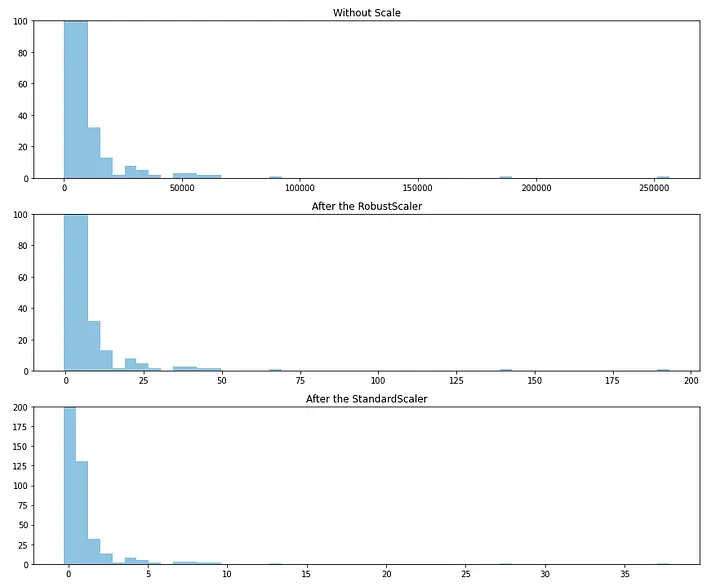

## Code snippet

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

import pandas as pd
import numpy as np

bigmart = pd.read_csv('./datasets/train_bm.csv')
data = bigmart[['Item_Visibility', 'Item_MRP']]
data.head()

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614


In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


In [11]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8523.000000,8523.000000
mean,0.201382,0.465635
std,0.157123,0.264327
min,0.000000,0.000000
25%,0.082187,0.265437
50%,0.164228,0.474209
75%,0.288026,0.655156
max,1.000000,1.000000
